In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape,test.shape

((32769, 10), (58921, 10))

In [5]:
train.head(10)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [7]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [9]:
train.isna().sum(),train.duplicated().sum()

(ACTION              0
 RESOURCE            0
 MGR_ID              0
 ROLE_ROLLUP_1       0
 ROLE_ROLLUP_2       0
 ROLE_DEPTNAME       0
 ROLE_TITLE          0
 ROLE_FAMILY_DESC    0
 ROLE_FAMILY         0
 ROLE_CODE           0
 dtype: int64,
 0)

In [10]:
test.isna().sum(),test.duplicated().sum()

(id                  0
 RESOURCE            0
 MGR_ID              0
 ROLE_ROLLUP_1       0
 ROLE_ROLLUP_2       0
 ROLE_DEPTNAME       0
 ROLE_TITLE          0
 ROLE_FAMILY_DESC    0
 ROLE_FAMILY         0
 ROLE_CODE           0
 dtype: int64,
 0)

In [11]:
for each in train.columns:
    print(each,len(train[each].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [12]:
train['ACTION'].value_counts()

ACTION
1    30872
0     1897
Name: count, dtype: int64

In [13]:
approved=train[train['ACTION']==1]
rejected=train[train['ACTION']==0]
approved.shape,rejected.shape

((30872, 10), (1897, 10))

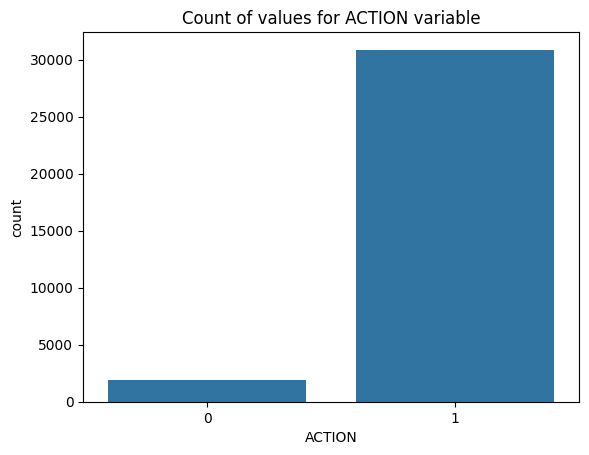

In [14]:
sb.countplot(x='ACTION',data=train);
plt.title('Count of values for ACTION variable');

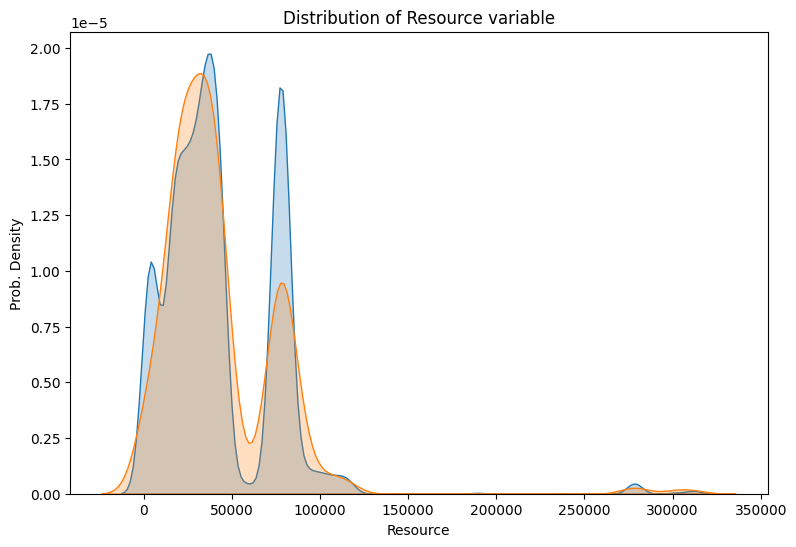

In [15]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['RESOURCE'].values,label='Accepted',shade=True);
sb.kdeplot(rejected['RESOURCE'],label='Rejected',shade=True);
plt.title('Distribution of Resource variable');
plt.xlabel('Resource');
plt.ylabel('Prob. Density');

In [16]:
# TOP Values
print('Top values for Approved requests')
print(approved['RESOURCE'].value_counts()[:10])
print('_'*50)
print('Top values for Rejected requests')
print(rejected['RESOURCE'].value_counts()[:10])

Top values for Approved requests
RESOURCE
4675     836
79092    468
75078    405
3853     398
25993    390
75834    294
6977     283
32270    279
42085    237
17308    236
Name: count, dtype: int64
__________________________________________________
Top values for Rejected requests
RESOURCE
20897    42
18072    29
13878    22
27416    19
25993    19
7543     17
6977     16
32270    16
79092    16
18913    13
Name: count, dtype: int64


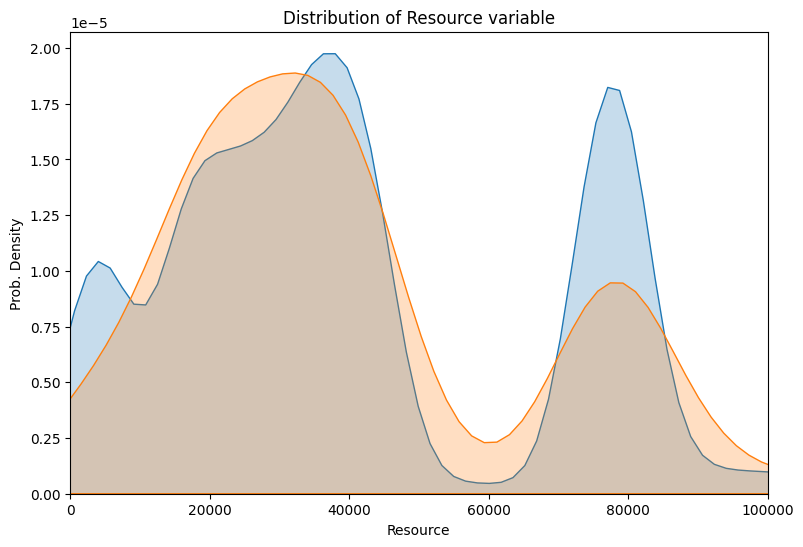

In [17]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['RESOURCE'].values,label='Approved',shade=True);
sb.kdeplot(rejected['RESOURCE'],label='Rejected',shade=True);
plt.title('Distribution of Resource variable');
plt.xlim([0,100000])
plt.xlabel('Resource');
plt.ylabel('Prob. Density');

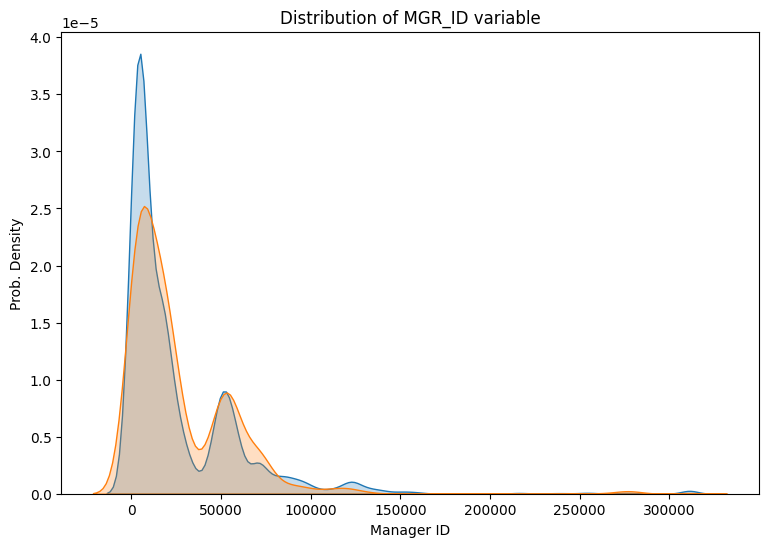

In [18]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['MGR_ID'],label='Accepted',shade=True);
sb.kdeplot(rejected['MGR_ID'],label='Rejected',shade=True);
plt.title('Distribution of MGR_ID variable');
plt.xlabel('Manager ID');
plt.ylabel('Prob. Density');

In [19]:
# TOP Values
print('Top values for Approved requests')
print(approved['MGR_ID'].value_counts()[:5])
print('_'*50)
print('Top values for Rejected requests')
print(rejected['MGR_ID'].value_counts()[:5])

Top values for Approved requests
MGR_ID
770     147
2270     96
2594     71
2014     67
1350     67
Name: count, dtype: int64
__________________________________________________
Top values for Rejected requests
MGR_ID
54618    30
4084     17
46526    16
70062    16
51345    14
Name: count, dtype: int64


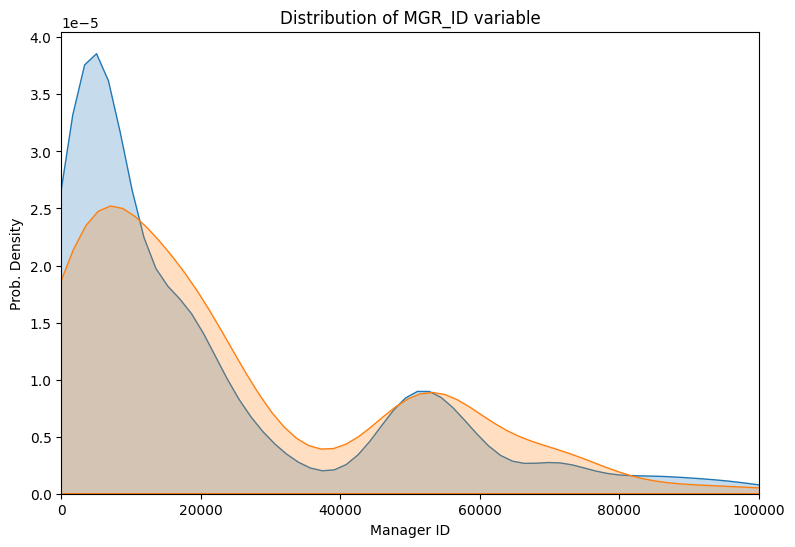

In [20]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['MGR_ID'],label='Accepted',shade=True);
sb.kdeplot(rejected['MGR_ID'],label='Rejected',shade=True);
plt.title('Distribution of MGR_ID variable');
plt.xlabel('Manager ID');
plt.xlim(0,100000);
plt.ylabel('Prob. Density');

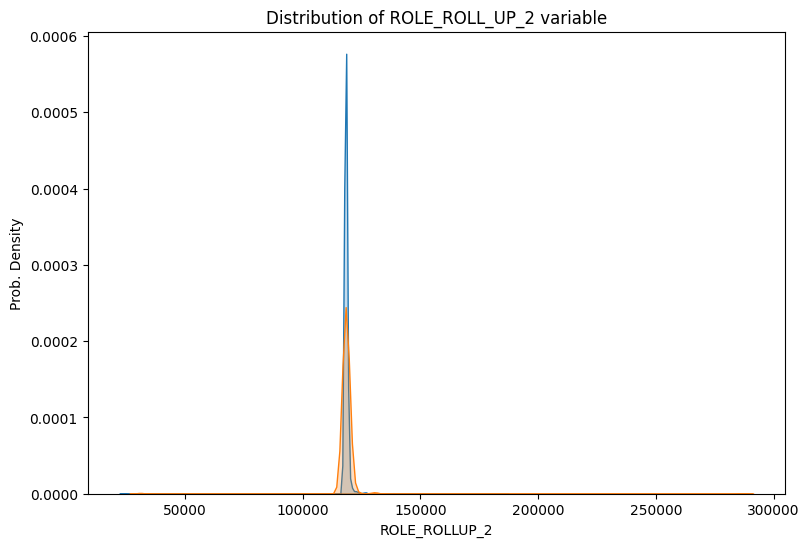

In [21]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_ROLLUP_2'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_ROLLUP_2'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLL_UP_2 variable');
plt.xlabel('ROLE_ROLLUP_2');
plt.ylabel('Prob. Density');

In [22]:
# TOP Values
print('Top values for Approved requests')
print(approved['ROLE_ROLLUP_2'].value_counts()[:5])
print('_'*50)
print('Top values for Rejected requests')
print(rejected['ROLE_ROLLUP_2'].value_counts()[:5])

Top values for Approved requests
ROLE_ROLLUP_2
118300    4230
118343    3823
118327    2521
118225    2438
118386    1639
Name: count, dtype: int64
__________________________________________________
Top values for Rejected requests
ROLE_ROLLUP_2
118300    194
118052    185
118386    157
118343    122
118327    120
Name: count, dtype: int64


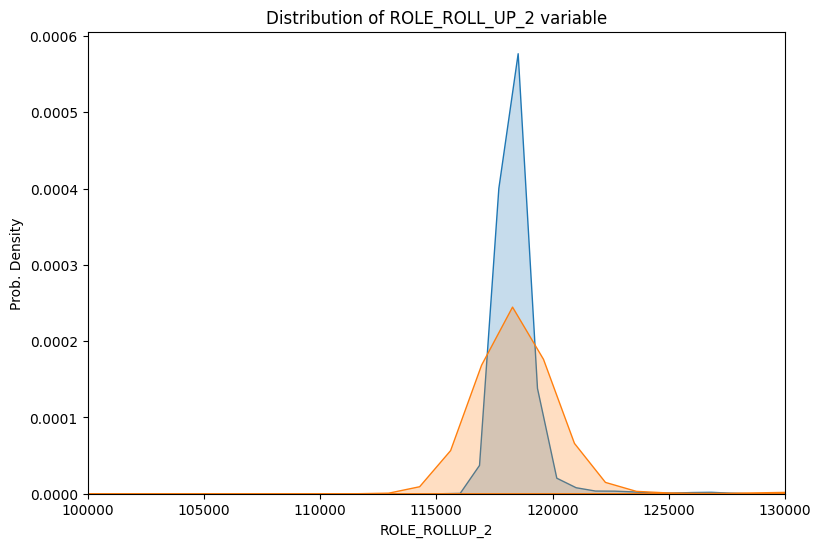

In [23]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_ROLLUP_2'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_ROLLUP_2'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLL_UP_2 variable');
plt.xlabel('ROLE_ROLLUP_2');
plt.xlim([100000,130000]);
plt.ylabel('Prob. Density');

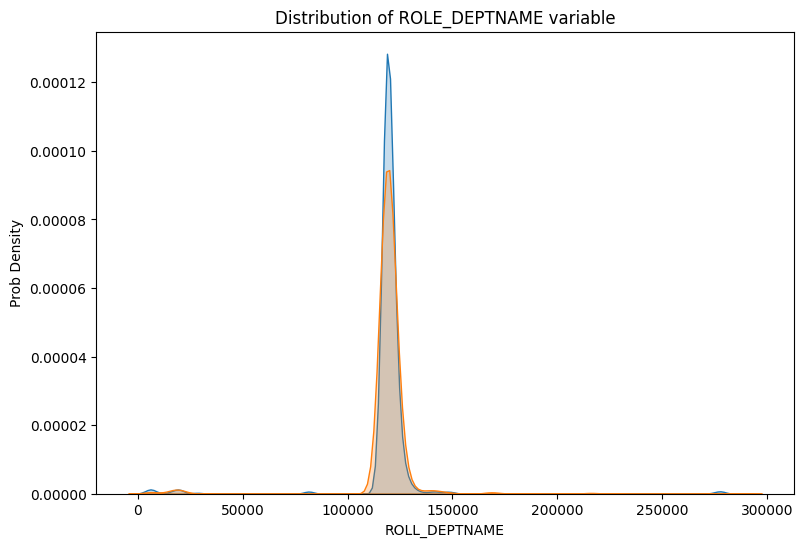

In [24]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_DEPTNAME'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_DEPTNAME'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_DEPTNAME variable');
plt.xlabel('ROLL_DEPTNAME');
plt.ylabel('Prob Density');


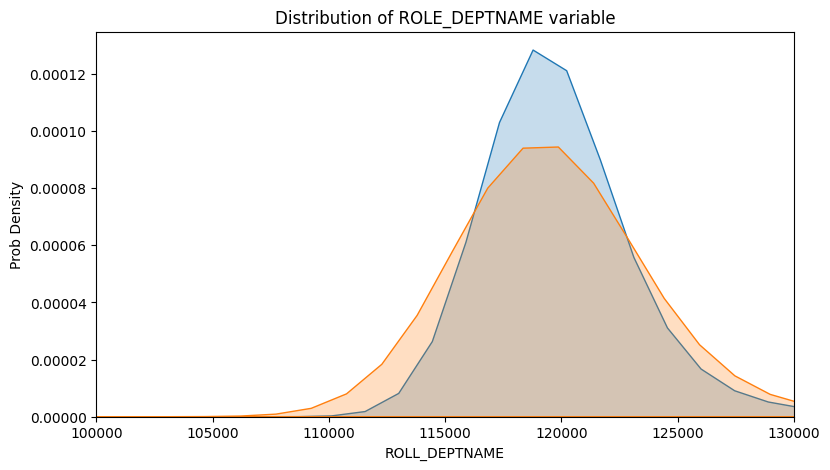

In [25]:
plt.figure(figsize=(9,5));
sb.kdeplot(approved['ROLE_DEPTNAME'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_DEPTNAME'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_DEPTNAME variable');
plt.xlabel('ROLL_DEPTNAME');
plt.ylabel('Prob Density');
plt.xlim([100000,130000]);

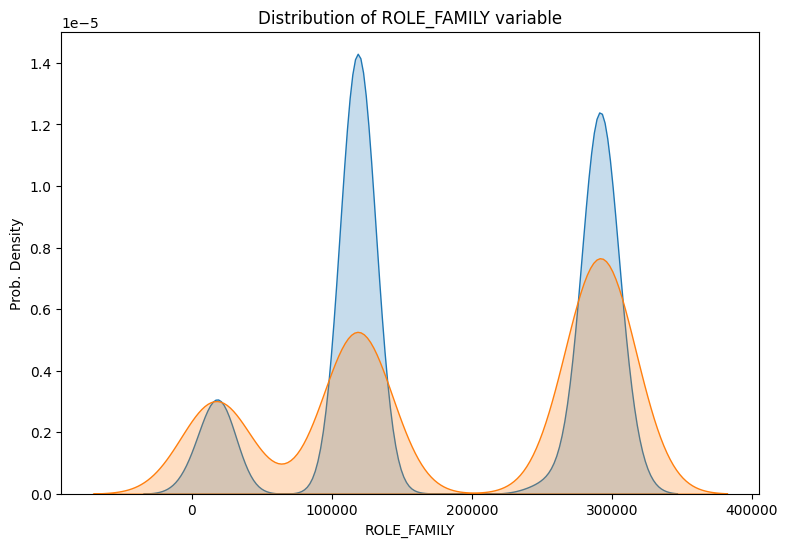

In [26]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_FAMILY'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_FAMILY'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY variable');
plt.xlabel('ROLE_FAMILY');
plt.ylabel('Prob. Density');

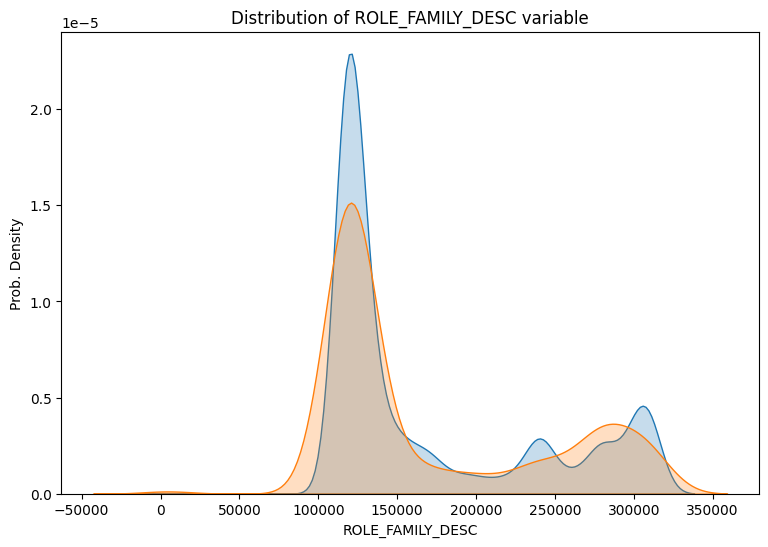

In [27]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_FAMILY_DESC'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_FAMILY_DESC'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY_DESC variable');
plt.xlabel('ROLE_FAMILY_DESC');
plt.ylabel('Prob. Density');

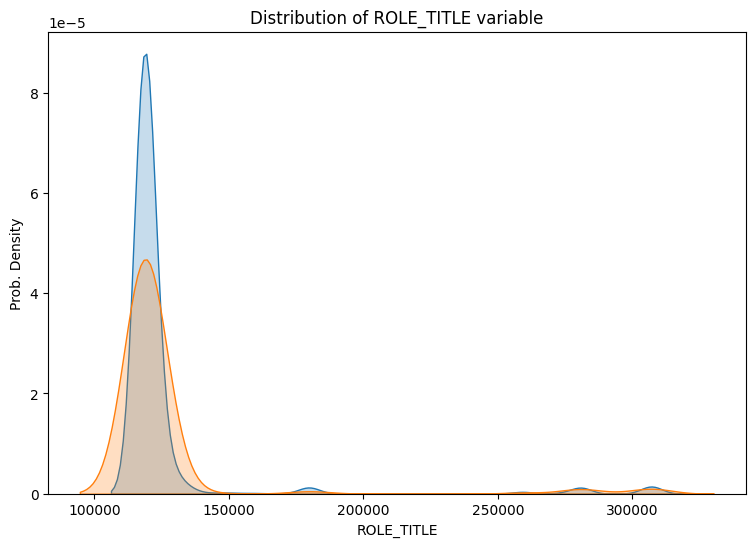

In [28]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_TITLE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlabel('ROLE_TITLE');
plt.ylabel('Prob. Density');

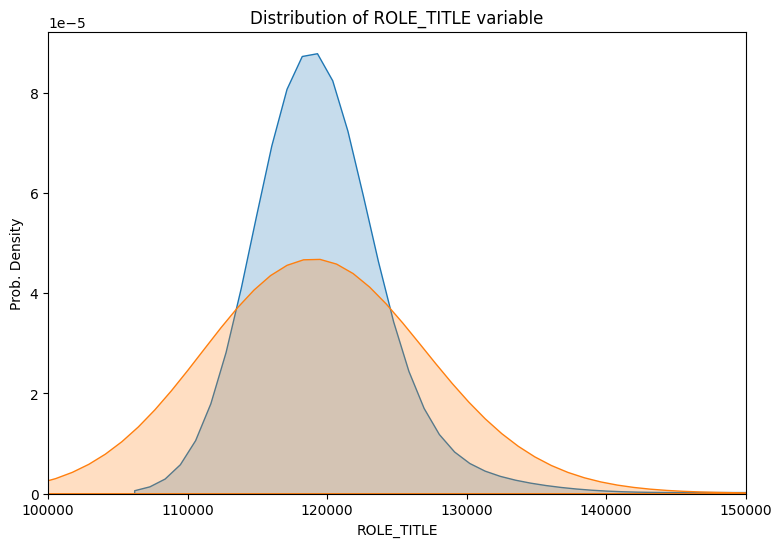

In [29]:
#Zoom in
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_TITLE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlabel('ROLE_TITLE');
plt.ylabel('Prob. Density');
plt.xlim([100000,150000]);

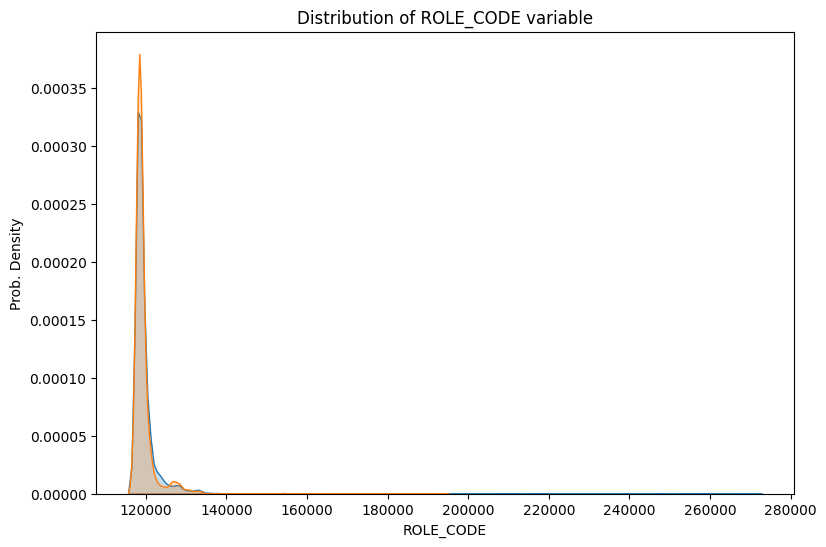

In [30]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_CODE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_CODE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_CODE variable');
plt.xlabel('ROLE_CODE');
plt.ylabel('Prob. Density');

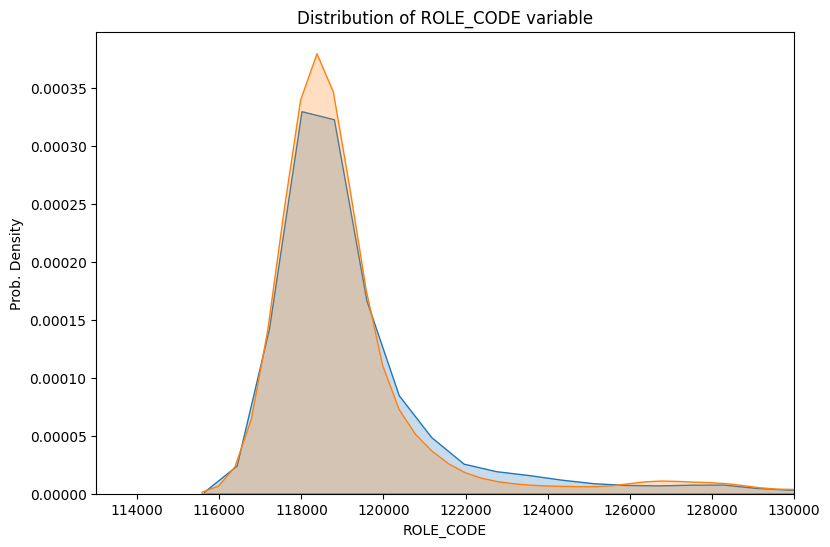

In [31]:
#Zoom in
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_CODE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_CODE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_CODE variable');
plt.xlabel('ROLE_CODE');
plt.ylabel('Prob. Density');
plt.xlim([113000,130000]);

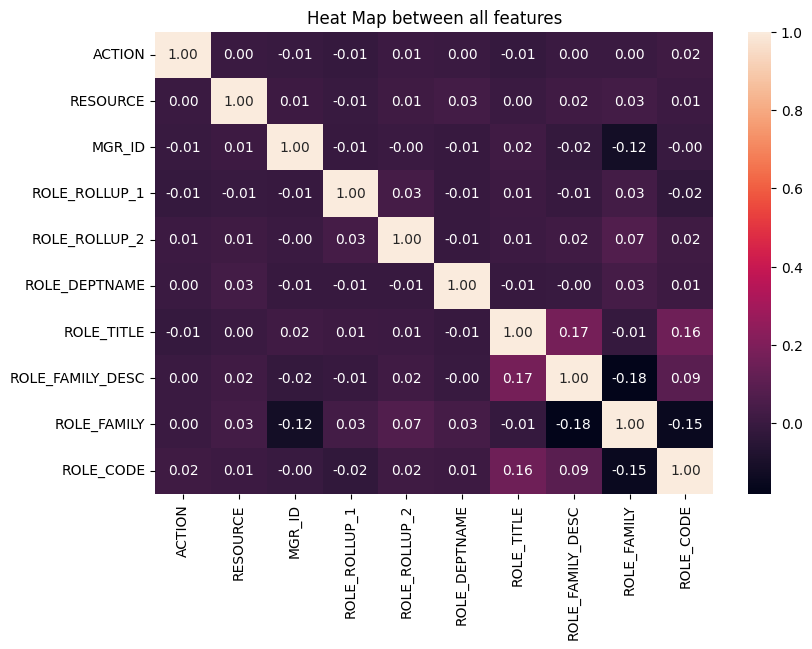

In [32]:
plt.figure(figsize=(9,6));
sb.heatmap(train.corr(),annot=True,fmt='.2f');
plt.title('Heat Map between all features');

<Figure size 1600x500 with 0 Axes>

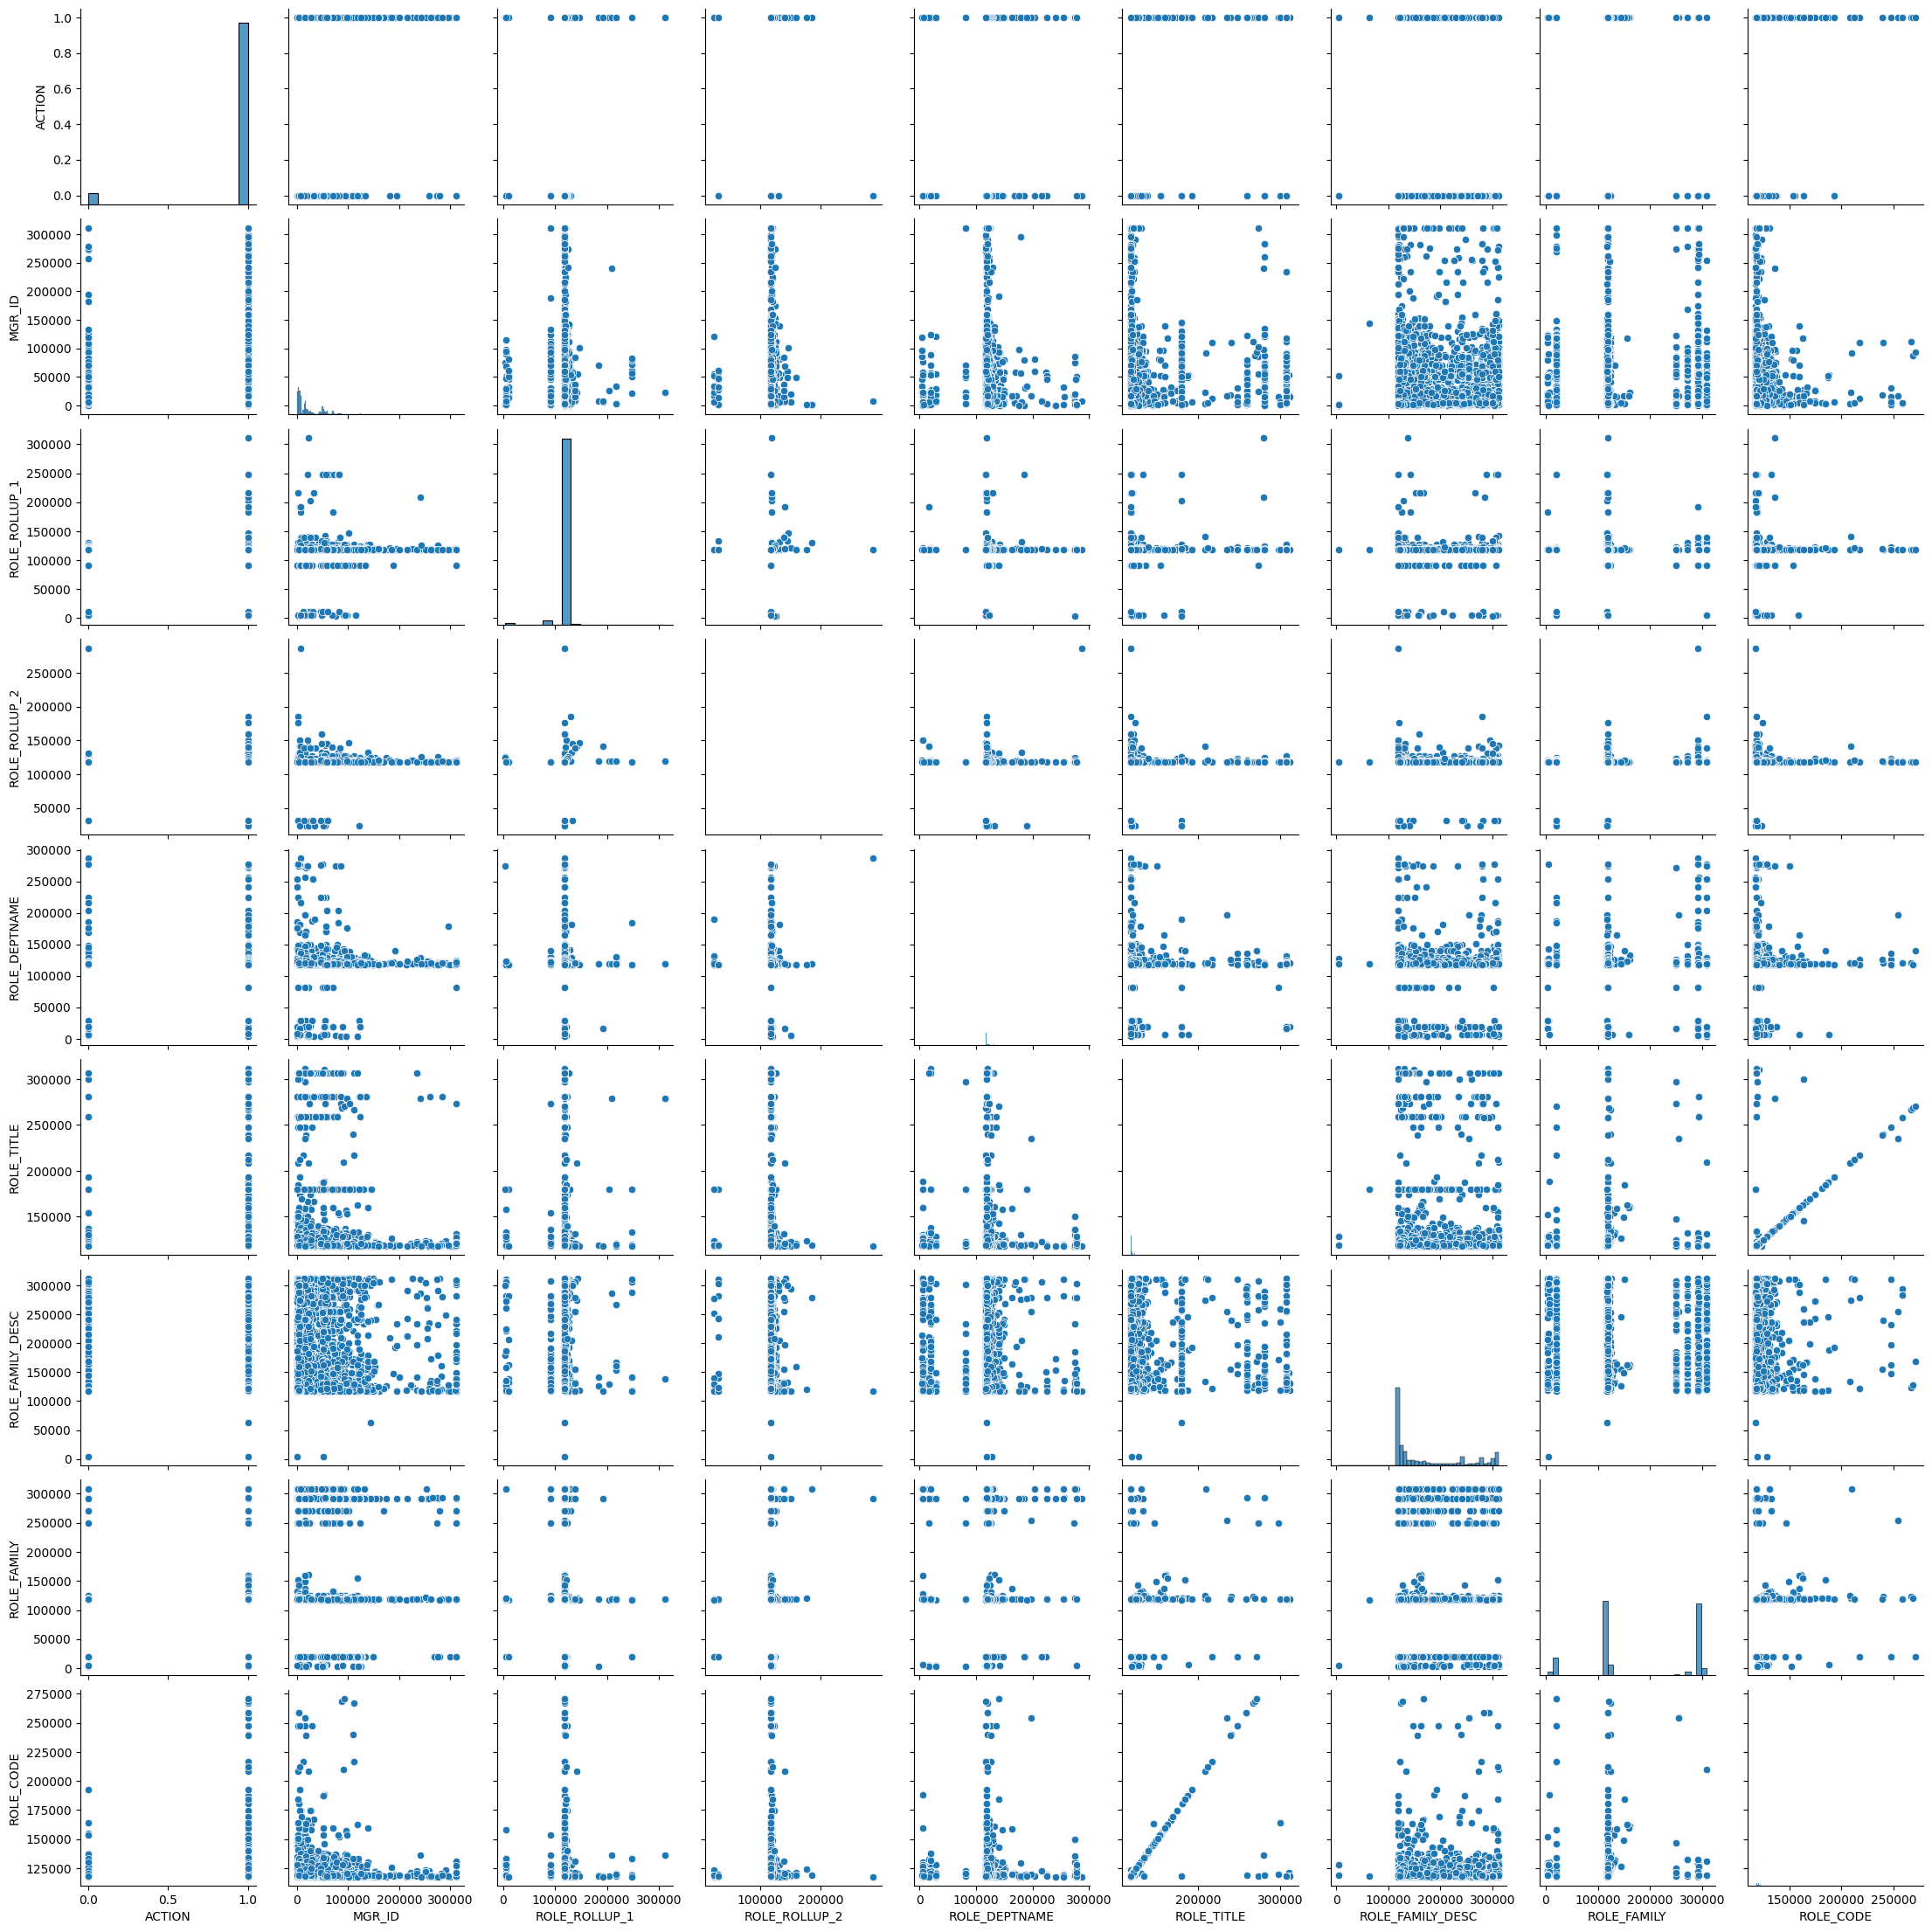

In [33]:
plt.figure(figsize=(16,5));
sb.pairplot(train[['ACTION','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY_DESC',
                   'ROLE_FAMILY','ROLE_CODE']]);

In [34]:
train_data=train.drop(columns=['ACTION'],axis=1)
train_data.shape

(32769, 9)

In [35]:
train_data.nunique()

RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [36]:
test_data=test.drop(columns=['id'],axis=1)
test_data.shape

(58921, 9)

In [37]:
test_data.nunique()

RESOURCE            4971
MGR_ID              4689
ROLE_ROLLUP_1        126
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        466
ROLE_TITLE           351
ROLE_FAMILY_DESC    2749
ROLE_FAMILY           68
ROLE_CODE            351
dtype: int64

In [38]:
train_svd = pd.DataFrame()
test_svd = pd.DataFrame()

In [39]:
a1 = train_data.groupby(['RESOURCE','MGR_ID'])['MGR_ID'].count()
a1=a1.unstack(fill_value=0)
a1

MGR_ID,25,27,30,32,33,36,43,46,47,55,...,311251,311338,311355,311433,311438,311597,311651,311682,311683,311696
RESOURCE,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from itertools import permutations
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

for col1,col2 in tqdm(permutations(train_data.columns,2)):
    res_train=(train_data.groupby([col1,col2])[col2].count()) 
    res_train=res_train.unstack(fill_value=0)

    svd=TruncatedSVD(n_components=1,random_state=42,).fit(res_train)
    val_train=svd.transform(res_train)
    
    
    val_train = pd.DataFrame(val_train)
    val_train = val_train.set_index(res_train.index)
    train_svd[col1+'_'+col2]=train[col1].map(val_train.iloc[:,0])
    
    
    
    test_svd[col1+'_'+col2]=test[col1].map(val_train.iloc[:,0])


72it [00:31,  2.28it/s]


In [41]:
train_svd.shape,test_svd.shape

((32769, 72), (58921, 72))

In [42]:
train_svd.fillna(0,inplace=True)
test_svd.fillna(0,inplace=True)
print(train_svd.isna().sum().values)
print(test_svd.isna().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
train_svd.head()

,RESOURCE_MGR_ID,RESOURCE_ROLE_ROLLUP_1,RESOURCE_ROLE_ROLLUP_2,RESOURCE_ROLE_DEPTNAME,RESOURCE_ROLE_TITLE,RESOURCE_ROLE_FAMILY_DESC,RESOURCE_ROLE_FAMILY,RESOURCE_ROLE_CODE,MGR_ID_RESOURCE,MGR_ID_ROLE_ROLLUP_1,...,ROLE_FAMILY_ROLE_FAMILY_DESC,ROLE_FAMILY_ROLE_CODE,ROLE_CODE_RESOURCE,ROLE_CODE_MGR_ID,ROLE_CODE_ROLE_ROLLUP_1,ROLE_CODE_ROLE_ROLLUP_2,ROLE_CODE_ROLE_DEPTNAME,ROLE_CODE_ROLE_TITLE,ROLE_CODE_ROLE_FAMILY_DESC,ROLE_CODE_ROLE_FAMILY
0,0.088724,2.995769,1.810303,0.070125,1.593630,2.919560,2.934431,1.593630,1.416749,5.499993e+01,...,6975.313331,6.146289e+03,288.345856,164.386849,2930.072697,1055.973092,1.816763,4.879706e-13,2.671720e+03,3.583000e+03
1,0.559935,25.998514,13.247680,1.084496,4.285689,4.534700,8.583779,4.285689,0.560297,9.999987e+00,...,0.101858,1.607367e-16,5.964018,0.288915,80.895295,25.034824,0.024511,-5.095221e-21,7.123211e-04,2.118202e-18
2,0.000108,0.007828,0.022128,0.509533,0.049782,0.007275,0.058700,0.049782,0.000724,5.493129e-10,...,0.024495,3.365502e-12,10.862651,0.000037,0.255356,0.160767,617.679185,-5.830794e-14,5.953084e-04,1.010481e-11
3,0.044904,0.998590,0.597128,0.018862,0.669129,0.164492,0.978144,0.669129,2.151085,6.199992e+01,...,6975.313331,6.146289e+03,292.012416,244.185412,4102.019163,1488.847285,2.455416,4.649000e+03,3.538719e+03,4.649000e+03
4,0.059410,2.022416,0.320066,0.804351,0.689633,0.175200,2.033620,0.689633,0.013122,1.490441e-04,...,0.000022,-7.200891e-18,0.267473,0.000104,0.010027,0.005174,8.969635,-9.548691e-22,1.778875e-10,-8.786877e-20


In [44]:
from sklearn.preprocessing import Normalizer
columns = (train_svd.columns)
x_vals1=train_svd[columns]
x_vals2=test_svd[columns]
n=Normalizer()
n.fit(x_vals1)
x_vals1 = n.transform(x_vals1)
train_svd = pd.DataFrame(x_vals1,columns=columns)
x_vals2 = n.transform(x_vals2)
test_svd = pd.DataFrame(x_vals2,columns=columns)
train_svd.shape,test_svd.shape

((32769, 72), (58921, 72))

In [45]:
train_svd.head()

,RESOURCE_MGR_ID,RESOURCE_ROLE_ROLLUP_1,RESOURCE_ROLE_ROLLUP_2,RESOURCE_ROLE_DEPTNAME,RESOURCE_ROLE_TITLE,RESOURCE_ROLE_FAMILY_DESC,RESOURCE_ROLE_FAMILY,RESOURCE_ROLE_CODE,MGR_ID_RESOURCE,MGR_ID_ROLE_ROLLUP_1,...,ROLE_FAMILY_ROLE_FAMILY_DESC,ROLE_FAMILY_ROLE_CODE,ROLE_CODE_RESOURCE,ROLE_CODE_MGR_ID,ROLE_CODE_ROLE_ROLLUP_1,ROLE_CODE_ROLE_ROLLUP_2,ROLE_CODE_ROLE_DEPTNAME,ROLE_CODE_ROLE_TITLE,ROLE_CODE_ROLE_FAMILY_DESC,ROLE_CODE_ROLE_FAMILY
0,3.338246e-06,0.000113,0.000068,2.638468e-06,0.000060,0.000110,0.000110,0.000060,5.330531e-05,2.069377e-03,...,2.624468e-01,2.312547e-01,0.010849,6.185070e-03,0.110244,0.039731,0.000068,1.835994e-17,1.005237e-01,1.348107e-01
1,3.290961e-05,0.001528,0.000779,6.374011e-05,0.000252,0.000267,0.000505,0.000252,3.293088e-05,5.877389e-04,...,5.986619e-06,9.447132e-21,0.000351,1.698070e-05,0.004755,0.001471,0.000001,-2.994663e-25,4.186593e-08,1.244952e-22
2,1.122108e-07,0.000008,0.000023,5.280569e-04,0.000052,0.000008,0.000061,0.000052,7.499907e-07,5.692832e-13,...,2.538523e-05,3.487855e-15,0.011258,3.821987e-08,0.000265,0.000167,0.640135,-6.042772e-17,6.169509e-07,1.047218e-14
3,1.733916e-06,0.000039,0.000023,7.283213e-07,0.000026,0.000006,0.000038,0.000026,8.306181e-05,2.394060e-03,...,2.693442e-01,2.373323e-01,0.011276,9.428956e-03,0.158395,0.057490,0.000095,1.795161e-01,1.366438e-01,1.795161e-01
4,4.072207e-04,0.013863,0.002194,5.513384e-03,0.004727,0.001201,0.013939,0.004727,8.994073e-05,1.021616e-06,...,1.516644e-07,-4.935814e-20,0.001833,7.149129e-07,0.000069,0.000035,0.061482,-6.545102e-24,1.219321e-12,-6.022921e-22


In [46]:
test_svd.head()

,RESOURCE_MGR_ID,RESOURCE_ROLE_ROLLUP_1,RESOURCE_ROLE_ROLLUP_2,RESOURCE_ROLE_DEPTNAME,RESOURCE_ROLE_TITLE,RESOURCE_ROLE_FAMILY_DESC,RESOURCE_ROLE_FAMILY,RESOURCE_ROLE_CODE,MGR_ID_RESOURCE,MGR_ID_ROLE_ROLLUP_1,...,ROLE_FAMILY_ROLE_FAMILY_DESC,ROLE_FAMILY_ROLE_CODE,ROLE_CODE_RESOURCE,ROLE_CODE_MGR_ID,ROLE_CODE_ROLE_ROLLUP_1,ROLE_CODE_ROLE_ROLLUP_2,ROLE_CODE_ROLE_DEPTNAME,ROLE_CODE_ROLE_TITLE,ROLE_CODE_ROLE_FAMILY_DESC,ROLE_CODE_ROLE_FAMILY
0,1.748205e-06,0.000014,0.000033,0.006349,0.000224,9.368598e-06,0.000464,0.000224,0.000001,5.580977e-20,...,2.057914e-05,2.827514e-15,0.009126,3.098385e-08,0.000215,0.000135,5.189408e-01,-4.898719e-17,5.001461e-07,8.489521e-15
1,4.757212e-07,0.000061,0.000016,0.000002,0.000040,5.865678e-05,0.000061,0.000040,0.000003,1.024593e-03,...,1.792938e-05,-1.951200e-18,0.000030,2.341034e-07,0.002751,0.000949,4.818718e-05,1.195552e-22,1.502169e-09,-3.841264e-20
2,1.895173e-05,0.000584,0.000352,0.000030,0.000014,8.070228e-07,0.000055,0.000014,0.000193,3.042470e-03,...,9.018517e-10,7.429734e-24,0.000134,3.147750e-07,0.000996,0.000530,4.060167e-07,3.080197e-26,5.827259e-14,7.736424e-26
3,3.237126e-06,0.000120,0.000032,0.000013,0.000080,1.984018e-05,0.000118,0.000080,0.000123,2.713827e-03,...,7.910264e-08,4.375788e-17,0.000589,3.272294e-04,0.015867,0.004973,5.197746e-06,-4.463996e-17,1.437485e-08,2.057506e-18
4,3.102218e-04,0.008945,0.004305,0.000712,0.001083,1.242129e-03,0.002395,0.001083,0.000075,1.109102e-03,...,3.883922e-08,3.344764e-20,0.000550,9.799353e-07,0.013715,0.007055,3.575300e-06,2.960215e-16,-1.034058e-17,2.045739e-21


In [47]:
# OHE for RESOURCE variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['RESOURCE'].values.reshape(-1,1))
resource_ohe_train = ohe.transform(train['RESOURCE'].values.reshape(-1,1))
resurce_ohe_test = ohe.transform(test['RESOURCE'].values.reshape(-1,1))
resource_ohe_train.shape,resurce_ohe_test.shape

((32769, 7518), (58921, 7518))

In [48]:
# OHE for MGR_ID variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['MGR_ID'].values.reshape(-1,1))
mgr_id_ohe_train = ohe.transform(train['MGR_ID'].values.reshape(-1,1))
mgr_id_ohe_test = ohe.transform(test['MGR_ID'].values.reshape(-1,1))
mgr_id_ohe_train.shape,mgr_id_ohe_test.shape

((32769, 4243), (58921, 4243))

In [49]:
# OHE for ROLE_ROLLUP_1 variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['ROLE_ROLLUP_1'].values.reshape(-1,1))
rollup1_ohe_train=ohe.transform(train['ROLE_ROLLUP_1'].values.reshape(-1,1))
rollup1_ohe_test=ohe.transform(test['ROLE_ROLLUP_1'].values.reshape(-1,1))
rollup1_ohe_train.shape,rollup1_ohe_test.shape

((32769, 128), (58921, 128))

In [50]:
# OHE for ROLE_ROLLUP_2 variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['ROLE_ROLLUP_2'].values.reshape(-1,1))
rollup2_ohe_train=ohe.transform(train['ROLE_ROLLUP_2'].values.reshape(-1,1))
rollup2_ohe_test=ohe.transform(test['ROLE_ROLLUP_2'].values.reshape(-1,1))
rollup2_ohe_train.shape,rollup2_ohe_test.shape

((32769, 177), (58921, 177))

In [51]:
# OHE for ROLE_DEPTNAME variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['ROLE_DEPTNAME'].values.reshape(-1,1))
deptname_ohe_train = ohe.transform(train['ROLE_DEPTNAME'].values.reshape(-1,1))
deptname_ohe_test = ohe.transform(test['ROLE_DEPTNAME'].values.reshape(-1,1))
deptname_ohe_train.shape,deptname_ohe_test.shape

((32769, 449), (58921, 449))

In [52]:
# OHE for ROLE_TITLE variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['ROLE_TITLE'].values.reshape(-1,1))
title_ohe_train = ohe.transform(train['ROLE_TITLE'].values.reshape(-1,1))
title_ohe_test = ohe.transform(test['ROLE_TITLE'].values.reshape(-1,1))
title_ohe_train.shape,title_ohe_test.shape

((32769, 343), (58921, 343))

In [53]:
# OHE for ROLE_FAMILY_DESC variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['ROLE_FAMILY_DESC'].values.reshape(-1,1))
family_desc_ohe_train = ohe.transform(train['ROLE_FAMILY_DESC'].values.reshape(-1,1))
family_desc_ohe_test = ohe.transform(test['ROLE_FAMILY_DESC'].values.reshape(-1,1))
family_desc_ohe_train.shape,family_desc_ohe_test.shape

((32769, 2358), (58921, 2358))

In [54]:
# OHE for ROLE_FAMILY variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['ROLE_FAMILY'].values.reshape(-1,1))
family_ohe_train = ohe.transform(train['ROLE_FAMILY'].values.reshape(-1,1))
family_ohe_test = ohe.transform(test['ROLE_FAMILY'].values.reshape(-1,1))
family_ohe_train.shape,family_ohe_test.shape

((32769, 67), (58921, 67))

In [55]:
# OHE for ROLE_CODE variable
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(train['ROLE_CODE'].values.reshape(-1,1))
code_ohe_train = ohe.transform(train['ROLE_CODE'].values.reshape(-1,1))
code_ohe_test = ohe.transform(test['ROLE_CODE'].values.reshape(-1,1))
code_ohe_train.shape,code_ohe_test.shape

((32769, 343), (58921, 343))

In [56]:
from scipy.sparse import hstack
ohe_train = hstack((resource_ohe_train,mgr_id_ohe_train,rollup1_ohe_train,rollup2_ohe_train,deptname_ohe_train,
                    title_ohe_train,family_desc_ohe_train,family_ohe_train,code_ohe_train))
ohe_train_y = train['ACTION'].values
ohe_test = hstack((resurce_ohe_test,mgr_id_ohe_test,rollup1_ohe_test,rollup2_ohe_test,deptname_ohe_test,
                    title_ohe_test,family_desc_ohe_test,family_ohe_test,code_ohe_test))

print(ohe_train.shape,ohe_test.shape,ohe_train_y.shape)

(32769, 15626) (58921, 15626) (32769,)


In [57]:
# Frequency coding for MGR_ID
values=train['RESOURCE'].value_counts() /len(train)
resource_fc_train = train['RESOURCE'].map(values)
resource_fc_test = test['RESOURCE'].map(values)
print(resource_fc_train.shape,resource_fc_test.shape,resource_fc_train.isna().sum(),resource_fc_test.isna().sum())
mgr_id_fc_test = resource_fc_test.fillna(0)
print(resource_fc_train.shape,resource_fc_test.shape,resource_fc_train.isna().sum(),resource_fc_test.isna().sum())

(32769,) (58921,) 0 0
(32769,) (58921,) 0 0


In [58]:
# Frequency coding for MGR_ID
values=train['MGR_ID'].value_counts() /len(train)
mgr_id_fc_train = train['MGR_ID'].map(values)
mgr_id_fc_test = test['MGR_ID'].map(values)
print(mgr_id_fc_train.shape,mgr_id_fc_test.shape,mgr_id_fc_train.isna().sum(),mgr_id_fc_test.isna().sum())
mgr_id_fc_test = mgr_id_fc_test.fillna(0)
print(mgr_id_fc_train.shape,mgr_id_fc_test.shape,mgr_id_fc_train.isna().sum(),mgr_id_fc_test.isna().sum())

(32769,) (58921,) 0 1627
(32769,) (58921,) 0 0


In [59]:
# ROLE_ROLLUP_1 variable
values=train['ROLE_ROLLUP_1'].value_counts() /len(train)
rollup1_fc_train = train['ROLE_ROLLUP_1'].map(values)
rollup1_fc_test = test['ROLE_ROLLUP_1'].map(values)
print(rollup1_fc_train.shape,rollup1_fc_test.shape,rollup1_fc_train.isna().sum(),rollup1_fc_test.isna().sum())
rollup1_fc_test = rollup1_fc_test.fillna(0)
print(rollup1_fc_train.shape,rollup1_fc_test.shape,rollup1_fc_train.isna().sum(),rollup1_fc_test.isna().sum())

(32769,) (58921,) 0 4
(32769,) (58921,) 0 0


In [60]:
# ROLE_ROLLUP_2 variable
values=train['ROLE_ROLLUP_2'].value_counts() /len(train)
rollup2_fc_train = train['ROLE_ROLLUP_2'].map(values)
rollup2_fc_test = test['ROLE_ROLLUP_2'].map(values)
print(rollup2_fc_train.shape,rollup2_fc_test.shape,rollup2_fc_train.isna().sum(),rollup2_fc_test.isna().sum())
rollup2_fc_test = rollup2_fc_test.fillna(0)
print(rollup2_fc_train.shape,rollup2_fc_test.shape,rollup2_fc_train.isna().sum(),rollup2_fc_test.isna().sum())

(32769,) (58921,) 0 12
(32769,) (58921,) 0 0


In [61]:
# Frequency coding for ROLE_DEPTNAME variable
values=train['ROLE_DEPTNAME'].value_counts()/len(train)
deptname_fc_train = train['ROLE_DEPTNAME'].map(values)
deptname_fc_test = test['ROLE_DEPTNAME'].map(values)
print(deptname_fc_train.shape,deptname_fc_test.shape,deptname_fc_train.isna().sum(),deptname_fc_test.isna().sum())
deptname_fc_test = deptname_fc_test.fillna(0)
print(deptname_fc_train.shape,deptname_fc_test.shape,deptname_fc_train.isna().sum(),deptname_fc_test.isna().sum())

(32769,) (58921,) 0 62
(32769,) (58921,) 0 0


In [62]:
# Frequency coding for ROLE_TITLE
values=train['ROLE_TITLE'].value_counts()/len(train)
title_fc_train = train['ROLE_TITLE'].map(values)
title_fc_test = test['ROLE_TITLE'].map(values)
print(title_fc_train.shape,title_fc_test.shape,title_fc_train.isna().sum(),title_fc_test.isna().sum())
title_fc_test = title_fc_test.fillna(0)
print(title_fc_train.shape,title_fc_test.shape,title_fc_train.isna().sum(),title_fc_test.isna().sum())

(32769,) (58921,) 0 30
(32769,) (58921,) 0 0


In [63]:
# Freq coding for ROLE_FAMILY_DESC
values=train['ROLE_FAMILY_DESC'].value_counts()/len(train)
family_desc_fc_train = train['ROLE_FAMILY_DESC'].map(values)
family_desc_fc_test = test['ROLE_FAMILY_DESC'].map(values)
print(family_desc_fc_train.shape,family_desc_fc_test.shape,family_desc_fc_train.isna().sum(),family_desc_fc_test.isna().sum())
family_desc_fc_test = family_desc_fc_test.fillna(0)
print(family_desc_fc_train.shape,family_desc_fc_test.shape,family_desc_fc_train.isna().sum(),family_desc_fc_test.isna().sum())

(32769,) (58921,) 0 1249
(32769,) (58921,) 0 0


In [64]:
# Freq coding for ROLE_FAMILY
values=train['ROLE_FAMILY'].value_counts()/len(train)
family_fc_train = train['ROLE_FAMILY'].map(values)
family_fc_test = test['ROLE_FAMILY'].map(values)
print(family_fc_train.shape,family_fc_test.shape,family_fc_train.isna().sum(),family_fc_test.isna().sum())
family_fc_test = family_fc_test.fillna(0)
print(family_fc_train.shape,family_fc_test.shape,family_fc_train.isna().sum(),family_fc_test.isna().sum())

(32769,) (58921,) 0 1
(32769,) (58921,) 0 0


In [65]:
# Freq coding for ROLE_CODE
values=train['ROLE_CODE'].value_counts()/len(train)
code_fc_train = train['ROLE_CODE'].map(values)
code_fc_test = test['ROLE_CODE'].map(values)
print(code_fc_train.shape,code_fc_test.shape,code_fc_train.isna().sum(),code_fc_test.isna().sum())
code_fc_test = code_fc_test.fillna(0)
print(code_fc_train.shape,code_fc_test.shape,code_fc_train.isna().sum(),code_fc_test.isna().sum())

(32769,) (58921,) 0 30
(32769,) (58921,) 0 0


In [66]:
fc_df_train = pd.DataFrame ({'resource_fc_train':resource_fc_train,'mgr_id_fc_train':mgr_id_fc_train,'rollup1_fc_train':rollup1_fc_train,'rollup2_fc_train':rollup2_fc_train,
                        'deptname_fc_train':deptname_fc_train,'title_fc_train':title_fc_train,
                        'family_desc_fc_train':family_desc_fc_train,
                        'family_fc_train':family_fc_train,'code_fc_train':code_fc_train})

fc_df_test = pd.DataFrame ({'resource_fc_test':resource_fc_test,'mgr_id_fc_test':mgr_id_fc_test,'rollup1_fc_test':rollup1_fc_test,'rollup2_fc_test':rollup2_fc_test,
                        'deptname_fc_test':deptname_fc_test,'title_fc_test':title_fc_test,
                        'family_desc_fc_test':family_desc_fc_test,
                        'family_fc_test':family_fc_test,'code_fc_test':code_fc_test})

fc_y_train = train['ACTION'].values

In [67]:
fc_df_train.shape,fc_y_train.shape,fc_df_test.shape

((32769, 9), (32769,), (58921, 9))

In [68]:
#RESOURCE
values= train.groupby('RESOURCE')['ACTION'].mean()
rc_resource_train = train['RESOURCE'].map(values)
rc_resource_test = test['RESOURCE'].map(values)
print(rc_resource_train.shape,rc_resource_test.shape,rc_resource_train.isna().sum(),rc_resource_test.isna().sum())
rc_resource_test = rc_resource_test.fillna(0.5)
print(rc_resource_train.shape,rc_resource_test.shape,rc_resource_train.isna().sum(),rc_resource_test.isna().sum())

(32769,) (58921,) 0 0
(32769,) (58921,) 0 0


In [69]:
#MGR_ID
values= train.groupby('MGR_ID')['ACTION'].mean()
rc_mgrid_train = train['MGR_ID'].map(values)
rc_mgrid_test = test['MGR_ID'].map(values)
print(rc_mgrid_train.shape,rc_mgrid_test.shape,rc_mgrid_train.isna().sum(),rc_mgrid_test.isna().sum())
rc_mgrid_test = rc_mgrid_test.fillna(0.5)
print(rc_mgrid_train.shape,rc_mgrid_test.shape,rc_mgrid_train.isna().sum(),rc_mgrid_test.isna().sum())

(32769,) (58921,) 0 1627
(32769,) (58921,) 0 0


In [70]:
# ROLE_ROLLUP_1
values= train.groupby('ROLE_ROLLUP_1')['ACTION'].mean()
rc_rollup1_train = train['ROLE_ROLLUP_1'].map(values)
rc_rollup1_test = test['ROLE_ROLLUP_1'].map(values)
print(rc_rollup1_train.shape,rc_rollup1_test.shape,rc_rollup1_train.isna().sum(),rc_rollup1_test.isna().sum())
rc_rollup1_test = rc_rollup1_test.fillna(0.5)
print(rc_rollup1_train.shape,rc_rollup1_test.shape,rc_rollup1_train.isna().sum(),rc_rollup1_test.isna().sum())

(32769,) (58921,) 0 4
(32769,) (58921,) 0 0


In [71]:
# ROLE_ROLLUP_2
values= train.groupby('ROLE_ROLLUP_2')['ACTION'].mean()
rc_rollup2_train = train['ROLE_ROLLUP_2'].map(values)
rc_rollup2_test = test['ROLE_ROLLUP_2'].map(values)
print(rc_rollup2_train.shape,rc_rollup2_test.shape,rc_rollup2_train.isna().sum(),rc_rollup2_test.isna().sum())
rc_rollup2_test = rc_rollup2_test.fillna(0.5)
print(rc_rollup2_train.shape,rc_rollup2_test.shape,rc_rollup2_train.isna().sum(),rc_rollup2_test.isna().sum())

(32769,) (58921,) 0 12
(32769,) (58921,) 0 0


In [72]:
# ROLE_DEPTNAME
values= train.groupby('ROLE_DEPTNAME')['ACTION'].mean()
rc_deptname_train = train['ROLE_DEPTNAME'].map(values)
rc_deptname_test = test['ROLE_DEPTNAME'].map(values)
print(rc_deptname_train.shape,rc_deptname_test.shape,rc_deptname_train.isna().sum(),rc_deptname_test.isna().sum())
rc_deptname_test = rc_deptname_test.fillna(0.5)
print(rc_deptname_train.shape,rc_deptname_test.shape,rc_deptname_train.isna().sum(),rc_deptname_test.isna().sum())

(32769,) (58921,) 0 62
(32769,) (58921,) 0 0


In [73]:
# ROLE_TITLE
values= train.groupby('ROLE_TITLE')['ACTION'].mean()
rc_title_train = train['ROLE_TITLE'].map(values)
rc_title_test = test['ROLE_TITLE'].map(values)
print(rc_title_train.shape,rc_title_test.shape,rc_title_train.isna().sum(),rc_title_test.isna().sum())
rc_title_test = rc_title_test.fillna(0.5)
print(rc_title_train.shape,rc_title_test.shape,rc_title_train.isna().sum(),rc_title_test.isna().sum())

(32769,) (58921,) 0 30
(32769,) (58921,) 0 0


In [74]:
# ROLE_FAMILY_DESC
values= train.groupby('ROLE_FAMILY_DESC')['ACTION'].mean()
rc_family_desc_train = train['ROLE_FAMILY_DESC'].map(values)
rc_family_desc_test = test['ROLE_FAMILY_DESC'].map(values)
print(rc_family_desc_train.shape,rc_family_desc_test.shape,rc_family_desc_train.isna().sum(),rc_family_desc_test.isna().sum())
rc_family_desc_test = rc_family_desc_test.fillna(0.5)
print(rc_family_desc_train.shape,rc_family_desc_test.shape,rc_family_desc_train.isna().sum(),rc_family_desc_test.isna().sum())

(32769,) (58921,) 0 1249
(32769,) (58921,) 0 0


In [75]:
# ROLE_FAMILY
values= train.groupby('ROLE_FAMILY')['ACTION'].mean()
rc_family_train = train['ROLE_FAMILY'].map(values)
rc_family_test = test['ROLE_FAMILY'].map(values)
print(rc_family_train.shape,rc_family_test.shape,rc_family_train.isna().sum(),rc_family_test.isna().sum())
rc_family_test = rc_family_test.fillna(0.5)
print(rc_family_train.shape,rc_family_test.shape,rc_family_train.isna().sum(),rc_family_test.isna().sum())

(32769,) (58921,) 0 1
(32769,) (58921,) 0 0


In [76]:
# ROLE_CODE
values= train.groupby('ROLE_CODE')['ACTION'].mean()
rc_code_train = train['ROLE_CODE'].map(values)
rc_code_test = test['ROLE_CODE'].map(values)
print(rc_code_train.shape,rc_code_test.shape,rc_code_train.isna().sum(),rc_code_test.isna().sum())
rc_code_test = rc_code_test.fillna(0.5)
print(rc_code_train.shape,rc_code_test.shape,rc_code_train.isna().sum(),rc_code_test.isna().sum())

(32769,) (58921,) 0 30
(32769,) (58921,) 0 0


In [77]:
rc_df_train = pd.DataFrame ({'rc_resource_train':rc_resource_train,'mgr_id_rc_train':rc_mgrid_train,'rollup1_rc_train':rc_rollup1_train,'rollup2_rc_train':rc_rollup1_train,
                        'deptname_rc_train':rc_deptname_train,'title_rc_train':rc_title_train,
                        'family_desc_rc_train':rc_family_desc_train,
                        'family_rc_train':rc_family_train,'code_rc_train':rc_code_train})
rc_df_test = pd.DataFrame ({'rc_resource_test':rc_resource_test,'mgr_id_rc_test':rc_mgrid_test,'rollup1_rc_test':rc_rollup1_test,'rollup2_rc_test':rc_rollup1_test,
                        'deptname_rc_test':rc_deptname_test,'title_rc_test':rc_title_test,
                        'family_desc_rc_test':rc_family_desc_test,
                        'family_rc_test':rc_family_test,'code_rc_test':rc_code_test})

rc_y_train = train['ACTION'].values

In [78]:
rc_df_train.shape,rc_y_train.shape,rc_df_test.shape

((32769, 9), (32769,), (58921, 9))

In [79]:
from sklearn.feature_selection import SelectKBest,chi2
ktop = SelectKBest(chi2,k=4500).fit(ohe_train,ohe_train_y)
ohe_train=ktop.transform(ohe_train)
ohe_test=ktop.transform(ohe_test)

In [80]:
ohe_train.shape,ohe_test.shape

((32769, 4500), (58921, 4500))

In [81]:
# saving all to dataframe
rc_df_train.to_csv('data/rc_df_train.csv',index=False)
rc_df_test.to_csv('data/rc_df_test.csv',index=False)
fc_df_train.to_csv('data/fc_df_train.csv',index=False)
fc_df_test.to_csv('data/fc_df_test.csv',index=False)
train_svd.to_csv('data/train_svd.csv',index=False)
test_svd.to_csv('data/test_svd.csv',index=False)

In [82]:
from scipy import sparse
sparse.save_npz('data/ohe_train.npz',ohe_train)
sparse.save_npz('data/ohe_test.npz',ohe_test)

In [83]:
ohe_train = sparse.load_npz('data/ohe_train.npz')
ohe_test = sparse.load_npz('data/ohe_test.npz')
ohe_train.shape,ohe_test.shape

((32769, 4500), (58921, 4500))

In [84]:
fc_df_train=pd.read_csv('data/fc_df_train.csv')
fc_df_test=pd.read_csv('data/fc_df_test.csv')
fc_df_train.shape,fc_df_test.shape

((32769, 9), (58921, 9))

In [85]:
rc_df_train=pd.read_csv('data/rc_df_train.csv')
rc_df_test=pd.read_csv('data/rc_df_test.csv')
rc_df_train.shape,rc_df_test.shape

((32769, 9), (58921, 9))

In [86]:
train_svd = pd.read_csv('data/train_svd.csv')
test_svd=pd.read_csv('data/test_svd.csv')
train_svd.shape,test_svd.shape

((32769, 72), (58921, 72))

In [87]:
train_data=train.drop(columns=['ACTION'],axis=1)
train_data.shape

(32769, 9)

In [88]:
y_true = train['ACTION']
y_true.shape

(32769,)

In [89]:
test_data=test.drop(columns=['id'],axis=1)
test_data.shape

(58921, 9)

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1,100,5)
lr= KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':n_neighbors}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=-1)
best_model = clf.fit(train_data,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


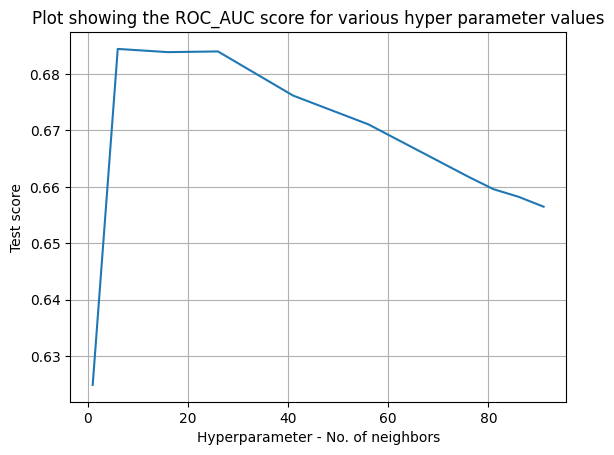

In [91]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_n_neighbors')
plt.plot(results['param_n_neighbors'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - No. of neighbors');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [92]:
best_c=best_model.best_params_['n_neighbors']
best_c

6

In [93]:
model = KNeighborsClassifier(n_neighbors=best_c,n_jobs=-1)
model.fit(train_data,y_true)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

predictions = model.predict_proba(test_data)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/knn.csv", index = False)

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1,100,5)
lr= KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':n_neighbors}
clf = RandomizedSearchCV(lr,parameters,random_state=42,cv=5,verbose=2,scoring='roc_auc',n_jobs=2)
best_model = clf.fit(ohe_train,y_true)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


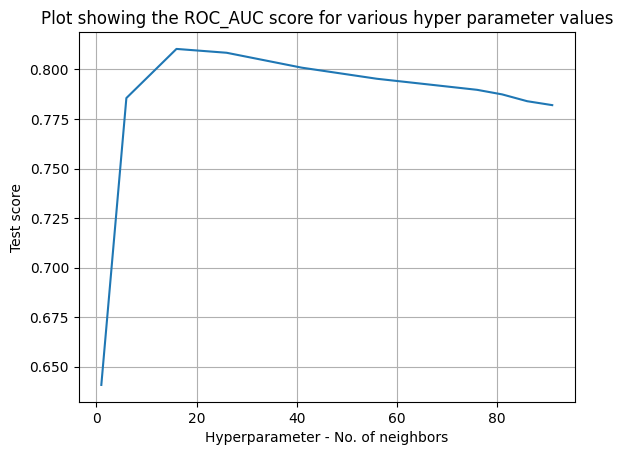

In [95]:
results = pd.DataFrame.from_dict(best_model.cv_results_)
results=results.sort_values('param_n_neighbors')
plt.plot(results['param_n_neighbors'],results['mean_test_score']);
plt.grid();
plt.xlabel('Hyperparameter - No. of neighbors');
plt.ylabel('Test score');
plt.title('Plot showing the ROC_AUC score for various hyper parameter values');

In [96]:
best_c=best_model.best_params_['n_neighbors']
best_c

16

In [97]:
model = KNeighborsClassifier(n_neighbors=best_c,n_jobs=-1)
model.fit(ohe_train,y_true)

KNeighborsClassifier(n_jobs=-1, n_neighbors=16)

In [98]:
predictions = model.predict_proba(ohe_test)[:,1]
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions
submit.to_csv("results/knn_ohe.csv", index = False)

In [99]:
import random
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [100]:
X = train.drop('ACTION', axis=1)
y = train['ACTION']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
# class DQNAgent:
#     def __init__(self, state_size, action_size):
#         self.state_size = state_size
#         self.action_size = action_size
#         self.memory = deque(maxlen=2000)
#         self.gamma = 0.95  # discount rate
#         self.epsilon = 1.0  # exploration rate
#         self.epsilon_decay = 0.995
#         self.epsilon_min = 0.01
#         # self.learning_rate = 0.001
#         self.model = self._build_model()

#     def _build_model(self):
#         model = Sequential()
#         model.add(Dense(24, input_dim=self.state_size, activation='relu'))
#         model.add(Dense(24, activation='relu'))
#         model.add(Dense(self.action_size, activation='linear'))
#         model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))  # Corrected here
#         return model

#     def remember(self, state, action, reward, next_state, done):
#         self.memory.append((state, action, reward, next_state, done))

#     def act(self, state):
#         if np.random.rand() <= self.epsilon:
#             return random.randrange(self.action_size)
#         act_values = self.model.predict(state)
#         return np.argmax(act_values[0])

#     def replay(self, batch_size):
#         minibatch = random.sample(self.memory, batch_size)
#         for state, action, reward, next_state, done in minibatch:
#             target = reward
#             if not done:
#                 target = (reward + self.gamma *
#                           np.amax(self.model.predict(next_state)[0]))
#             target_f = self.model.predict(state)
#             target_f[0][action] = target
#             self.model.fit(state, target_f, epochs=1, verbose=0)
#         if self.epsilon > self.epsilon_min:
#             self.epsilon *= self.epsilon_decay


In [107]:
# # Initialize agent
# state_size = X_train_scaled.shape[1]
# action_size = 2  # Assuming binary classification (0 or 1)
# agent = DQNAgent(state_size, action_size)
# batch_size = 32
# # 
# # Training
# episodes = 10
# for e in range(episodes):
#     for i in range(len(X_train_scaled)):
#         state = np.reshape(X_train_scaled[i], [1, state_size])
#         action = int(y_train.iloc[i])
#         next_state = np.reshape(X_train_scaled[i+1], [1, state_size]) if i < len(X_train_scaled)-1 else state
#         reward = 1 if action == agent.act(state) else -1
#         done = True if i == len(X_train_scaled)-1 else False
#         agent.remember(state, action, reward, next_state, done)
#     if len(agent.memory) > batch_size:
#         agent.replay(batch_size)


In [108]:
# scores = []
# y_pred=[]
# for i in range(len(X_test_scaled)):
#     state = np.reshape(X_test_scaled[i], [1, state_size])
#     action = int(y_test.iloc[i])
#     y_pred.append(action)
#     score = 1 if action == agent.act(state) else 0
#     scores.append(score)

# accuracy = sum(scores) / len(scores)
# print("Accuracy:", accuracy)



In [109]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from collections import Counter

svm = SVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
class_counts=Counter(pred)
print("Predicted actions 0:",class_counts[0])
print("Class 1:", class_counts[1])



Accuracy: 0.9436985047299359
Predicted actions 0: 0
Class 1: 6554


In [110]:
#Randomforestclassifier accuracy 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy=accuracy_score(y_test, pred)*100
print("Random classifier accuracy:")
print(accuracy)
print("Predicted actions:", Counter(pred))

print("Predicted actions:")
inp0 = np.array([[74935,16024,117961,118300,119984,120647,311441,118398,120649]])
pred0 = rf.predict(inp0)
print(pred0)
inp1=np.array([[15720,15824,117961,118225,120323,122849,120324,119095,122850]])
pred1 = rf.predict(inp1)
print(pred1)




Random classifier accuracy:
94.9801647848642
Predicted actions: Counter({1: 6300, 0: 254})
Predicted actions:
[0]
[1]


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict using KNN classifier
pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, pred) * 100
print("KNN Classifier Accuracy:", accuracy)

# Print predicted actions for KNN classifier
print("Predicted actions:", Counter(pred))

# Make predictions for a new state using KNN classifier
inp0 = np.array([[74935, 16024, 117961, 118300, 119984, 120647, 311441, 118398, 120649]])
pred0 = knn.predict(inp0)
print("Prediction for new state using KNN classifier:", pred0)


KNN Classifier Accuracy: 94.04943545926152
Predicted actions: Counter({1: 6443, 0: 111})
Prediction for new state using KNN classifier: [1]


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter

# Train Logistic Regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict using Logistic Regression classifier
pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, pred) * 100
print("Logistic Regression Classifier Accuracy:", accuracy)

# Print predicted actions for Logistic Regression classifier
print("Predicted actions:", Counter(pred))

# Make predictions for a new state using Logistic Regression classifier
inp0 = np.array([[74935, 16024, 117961, 118300, 119984, 120647, 311441, 118398, 120649]])
pred0 = log_reg.predict(inp0)
print("Prediction for new state using Logistic Regression classifier:", pred0)


Logistic Regression Classifier Accuracy: 94.36985047299359
Predicted actions: Counter({1: 6554})
Prediction for new state using Logistic Regression classifier: [1]
